In [1]:
import pandas as pd

### Import the associated csv file with the first column as index of type 'Int64' and answer the following questions using Python commands. Do not change anything in the csv file.

In [6]:
df = pd.read_csv("ex29_data.csv", header=0, index_col='RespondentID')
df.index = df.index.astype('int64')
df.index.dtype

dtype('int64')

### a) What percentage is neither a fan of the Star Wars franchise nor of the Star Trek franchise?

In [33]:
all = df.index.nunique()
df.loc[(df['fan_sw'] == 'No') & (df['fan_st'] == 'No')].count().max() / all * 100

20.06745362563238

### b) Plot a histogram of the age of all respondents who have seen at least one Star Wars film. Plot a histogram of the age of all respondents who have seen all of the latter episodes (IV to VI) but none of the first three (I to III). What observation do you make?

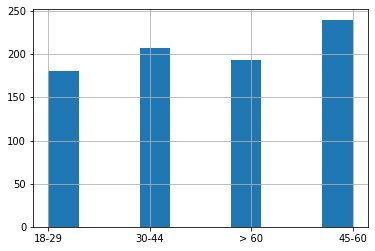

In [21]:
df['age'].loc[df['seen_any_film'] == 'Yes'].hist()

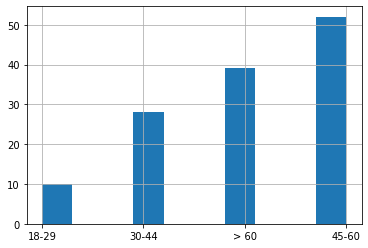

In [27]:
df['age'].loc[(df['seen_ep1'] == 'No') & (df['seen_ep2'] == 'No') & (df['seen_ep3'] == 'No') & ((df['seen_ep4'] == 'Yes') | (df['seen_ep5'] == 'Yes') | (df['seen_ep6'] == 'Yes'))].hist()

The main Star-Wars fans are between 45 and 60 years old and have only seen Episodes IV to VI

### c) How many of those who have seen at least one of the six films in the Star Wars franchise are unfamiliar (“Unfamiliar (N/A)”) with at least one character? Give the absolute number and the percentage.

In [35]:
unf = df.loc[(df['seen_any_film'] == 'Yes') &
       (df['like_char1'] == 'Unfamiliar (N/A)') |
       (df['like_char2'] == 'Unfamiliar (N/A)') |
       (df['like_char3'] == 'Unfamiliar (N/A)') |
       (df['like_char4'] == 'Unfamiliar (N/A)') |
       (df['like_char5'] == 'Unfamiliar (N/A)') |
       (df['like_char6'] == 'Unfamiliar (N/A)') |
       (df['like_char7'] == 'Unfamiliar (N/A)') |
       (df['like_char8'] == 'Unfamiliar (N/A)') |
       (df['like_char9'] == 'Unfamiliar (N/A)') |
       (df['like_char10'] == 'Unfamiliar (N/A)') |
       (df['like_char11'] == 'Unfamiliar (N/A)') |
       (df['like_char12'] == 'Unfamiliar (N/A)') |
       (df['like_char13'] == 'Unfamiliar (N/A)') |
       (df['like_char14'] == 'Unfamiliar (N/A)')
].count().max()
print(f'Absoute: {unf}')
print(f'Percentage: {unf / all * 100}')

Absoute: 269
Percentage: 22.681281618887013


### d) How many respondents have seen all six films? Determine which film is the least favorite according to the respondents who watched all six films. To this end, calculate the column-wise mean and the median for the required columns (and rows).

In [57]:
all_six = df.loc[
    (df['seen_ep1'] == 'Yes') &
    (df['seen_ep2'] == 'Yes') &
    (df['seen_ep3'] == 'Yes') &
    (df['seen_ep4'] == 'Yes') &
    (df['seen_ep5'] == 'Yes') &
    (df['seen_ep6'] == 'Yes')
]

print(f'All Six: {all_six.index.nunique()}')

All Six: 471


In [58]:
print(f'Least Favorite: \n{all_six[["rank_ep1", "rank_ep2", "rank_ep3", "rank_ep4", "rank_ep5", "rank_ep6"]].sum().nsmallest(1)}')

Least Favorite: 
rank_ep5    1121.0
dtype: float64


In [59]:
print(f'Mean: \n{all_six[["rank_ep1", "rank_ep2", "rank_ep3", "rank_ep4", "rank_ep5", "rank_ep6"]].mean()}')

Mean: 
rank_ep1    4.237792
rank_ep2    4.326964
rank_ep3    4.253191
rank_ep4    2.866242
rank_ep5    2.380042
rank_ep6    2.932059
dtype: float64


In [60]:
print(f'Median: \n{all_six[["rank_ep1", "rank_ep2", "rank_ep3", "rank_ep4", "rank_ep5", "rank_ep6"]].median()}')

Median: 
rank_ep1    4.0
rank_ep2    5.0
rank_ep3    4.0
rank_ep4    3.0
rank_ep5    2.0
rank_ep6    3.0
dtype: float64


### e) Which character is liked least by men (average score)? Which character is liked most by women (average score)?

In [85]:
chars = df[[
    'like_char1',
    'like_char2',
    'like_char3',
    'like_char4',
    'like_char5',
    'like_char6',
    'like_char7',
    'like_char8',
    'like_char9',
    'like_char10',
    'like_char11',
    'like_char12',
    'like_char13',
    'like_char14'
]]

chars.loc[df['gender'] == 'Male'].mean(axis='columns')

RespondentID
3292879998   NaN
3292879538   NaN
3292765271   NaN
3292763116   NaN
3292731220   NaN
              ..
3288429390   NaN
3288423088   NaN
3288415166   NaN
3288408698   NaN
3288396374   NaN
Length: 497, dtype: float64